In [2]:
D_PayneDir = '/global/home/users/nathan_sandford/D-Payne/'

import sys
sys.path.append(D_PayneDir)

import numpy as np
import utils
from model_spectra import get_spectrum_from_neural_net as payne_spec

import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]
import matplotlib.pyplot as plt

In [3]:
wavelength = utils.load_wavelength_array()
temp = np.load(D_PayneDir + '/spectra/convolved_masking_spectra.npz')
spectra_sol = temp['spectra_sol']
spectra_sol2 = temp['spectra_sol2']
spectra_arc = temp['spectra_arc']
temp.close()

In [41]:
NN_coeffs = utils.read_in_neural_network(name='norm_spectra_approx')
labels_solar = np.array([0,0,0,0,0,0,0,0,5780,4.438])
labels_arcturus =np.array([0,0.37,0.33,0,0,0.11,0.23,-0.52,4286,1.66])

spectra_sol_payne = payne_spec(labels_solar,NN_coeffs)
spectra_arc_payne = payne_spec(labels_arcturus,NN_coeffs)

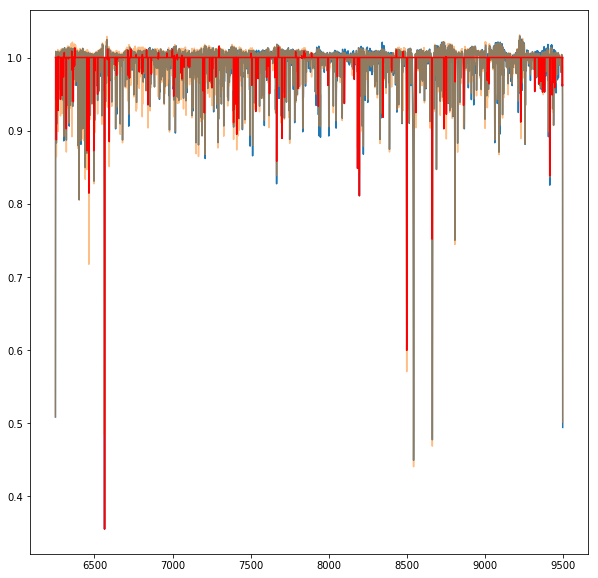

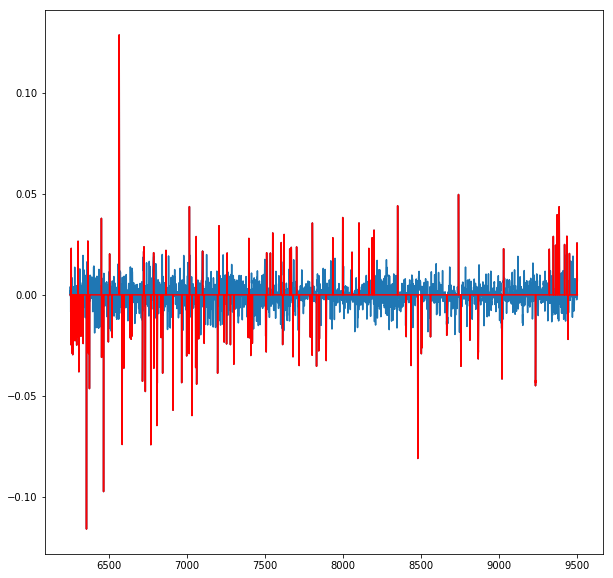

In [42]:
model_err = spectra_sol_payne - spectra_sol
mask = np.argwhere(np.abs(model_err) > 0.02)

plt.plot(wavelength,spectra_sol)
plt.plot(wavelength,spectra_sol_payne,alpha=0.5)
spectra_sol_masked = np.ones(len(spectra_sol))
spectra_sol_masked[mask] = spectra_sol[mask]
plt.plot(wavelength,spectra_sol_masked,c='r')
#plt.xlim(8500,9000)
plt.show()

plt.plot(wavelength,spectra_sol_payne-spectra_sol)
model_err_masked = np.zeros(len(spectra_sol))
model_err_masked[mask] = spectra_sol_payne[mask] - spectra_sol[mask]
plt.plot(wavelength,model_err_masked,c='r')
plt.show()


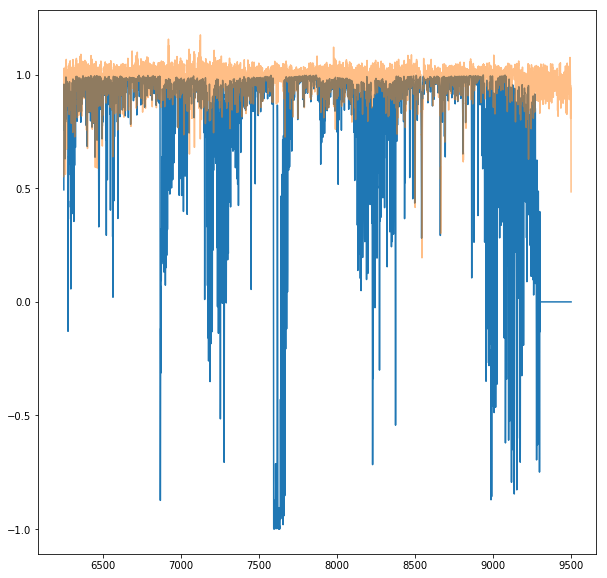

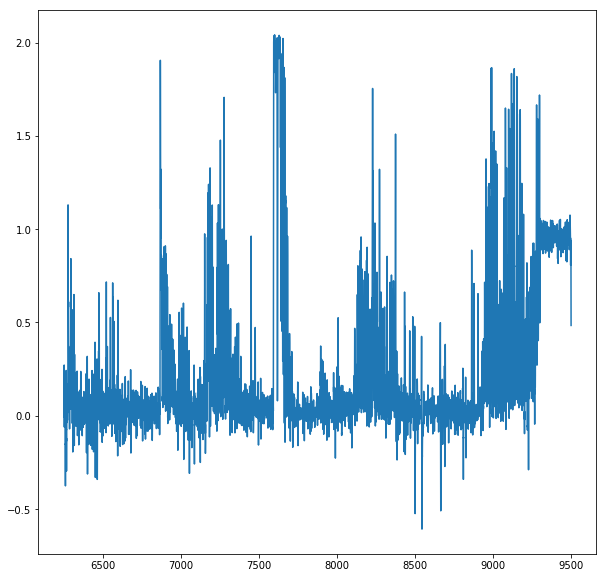

In [43]:
#model_err = spectra_arc_payne - spectra_arc
#mask = np.argwhere(np.abs(model_err) > 0.02)

plt.plot(wavelength,spectra_arc)
plt.plot(wavelength,spectra_arc_payne,alpha=0.5)
#spectra_sol_masked = np.ones(len(spectra_sol))
#spectra_sol_masked[mask] = spectra_sol[mask]
#plt.plot(wavelength,spectra_sol_masked,c='r')
#plt.xlim(8500,9000)
plt.show()

plt.plot(wavelength,spectra_arc_payne-spectra_arc)
#model_err_masked = np.zeros(len(spectra_sol))
#model_err_masked[mask] = spectra_sol_payne[mask] - spectra_sol[mask]
#plt.plot(wavelength,model_err_masked,c='r')
plt.show()
